In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from scipy.stats import norm
# Carregando os arquivos
smart_tv_data = pd.read_csv('dados/dataset_smart_tv.csv')
chromecast_data = pd.read_csv('dados/dataset_chromecast.csv')

# Ver as 5 primeiras linhas
print(smart_tv_data)
print(chromecast_data)

         device_id            date_hour       bytes_up    bytes_down
0         77209603  2021-11-22 15:23:00  132932.983607  2.818140e+06
1         77209603  2021-11-22 15:24:00  115770.491803  2.264410e+06
2         77209603  2021-11-22 15:25:00  114030.032787  2.309270e+06
3         77209603  2021-11-22 15:26:00   97170.622951  2.006544e+06
4         77209603  2021-11-22 15:27:00   39569.573770  8.061440e+05
...            ...                  ...            ...           ...
4417898   40241962  2021-11-25 23:19:00       8.000000  8.000000e+00
4417899   40241962  2021-11-25 23:21:00       8.000000  8.000000e+00
4417900   40241962  2021-11-25 23:23:00       8.000000  8.000000e+00
4417901   40241962  2021-11-25 23:25:00       8.000000  8.000000e+00
4417902   40241962  2021-11-25 23:26:00       8.000000  3.200000e+01

[4417903 rows x 4 columns]
   device_id            date_hour     bytes_up    bytes_down
0   66161985  2021-09-06 00:01:00  2987.016393  49185.704918
1   66161985  2021-09-

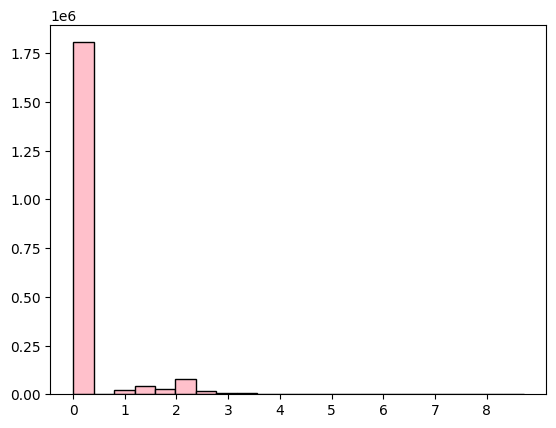

In [20]:
viadao = smart_tv_data[(smart_tv_data['bytes_up'] == 0) | (smart_tv_data['bytes_down'] == 0)]
viadao_logs_up = viadao['log_bytes_up']
bins_viadao = calcular_bins_sturges(viadao_logs_up)

plt.hist(viadao_logs_up, bins=bins_viadao, color='pink', edgecolor='black')
plt.xticks(range(0,9))
plt.show()


In [14]:
smart_tv_data['log_bytes_up'] = np.log10(smart_tv_data['bytes_up'] + 1)
smart_tv_data['log_bytes_down'] = np.log10(smart_tv_data['bytes_down'] + 1)
chromecast_data['log_bytes_up'] = np.log10(chromecast_data['bytes_up'] + 1)
chromecast_data['log_bytes_down'] = np.log10(chromecast_data['bytes_down'] + 1)

In [15]:
def calcular_bins_sturges(data):
    n = len(data)
    return int(np.ceil(1 + np.log2(n)))

Histograma e estatísticas para Smart TV - Log Bytes Upload

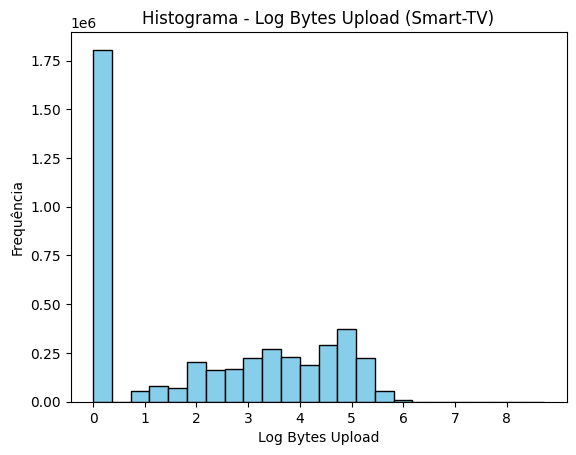

Smart TV - Log Bytes Upload: Média: 2.16, Variância: 4.11, Desvio Padrão: 2.03


In [6]:
# Histograma para Smart TV (Log Bytes Up)
smart_tv_log_bytes_up = smart_tv_data['log_bytes_up']
bins_smart_tv_up = calcular_bins_sturges(smart_tv_log_bytes_up)


plt.hist(smart_tv_log_bytes_up, bins=bins_smart_tv_up, color='skyblue', edgecolor='black')
plt.xticks(range(0, 9))  # Define os valores do eixo x de 0 a 8
plt.title('Histograma - Log Bytes Upload (Smart-TV)')
plt.xlabel('Log Bytes Upload')
plt.ylabel('Frequência')
plt.show()

# Estatísticas - Smart TV (Log Bytes Up)
media_smart_tv_up = np.mean(smart_tv_log_bytes_up)
variancia_smart_tv_up = np.var(smart_tv_log_bytes_up, ddof=1)
desvio_padrao_smart_tv_up = np.std(smart_tv_log_bytes_up, ddof=1)
print(f'Smart TV - Log Bytes Upload: Média: {media_smart_tv_up:.2f}, Variância: {variancia_smart_tv_up:.2f}, Desvio Padrão: {desvio_padrao_smart_tv_up:.2f}')


89.60% dos dados de upload são iguais a zero.


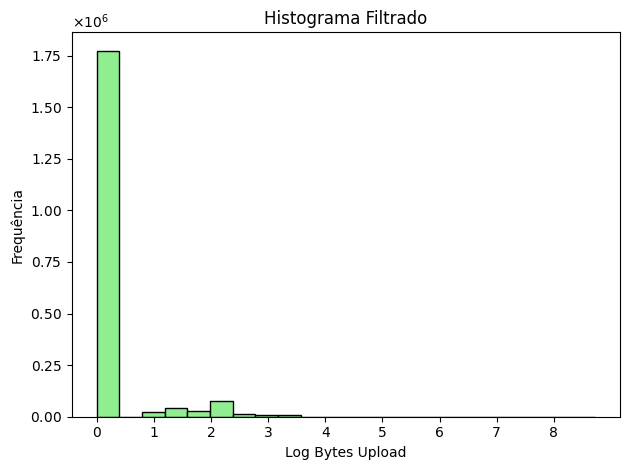

In [7]:
usuarios01 = smart_tv_data[(smart_tv_data['log_bytes_down'] == 0)]
usuarios01_bytes_down = usuarios01['log_bytes_up']
bins_usuarios01 = calcular_bins_sturges(usuarios01_bytes_down)




plt.hist(usuarios01_bytes_down, bins=bins_usuarios01, color='lightgreen', edgecolor='black')
plt.xticks(range(0, 9))  # Define os valores do eixo x de 0 a 8
plt.title('Histograma Filtrado')
plt.ylabel('Frequência')
plt.xlabel('Log Bytes Upload')

# Configurar o formato do eixo Y para notação exponencial
ax = plt.gca()  # Obter o eixo atual
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Forçar notação científica
ax.yaxis.set_major_formatter(formatter)


valores_iguais_a_zero = (usuarios01['log_bytes_up'] == 0).sum()
# Calcular a porcentagem
porcentagem_iguais_a_zero = (valores_iguais_a_zero / len(usuarios01)) * 100

print(f"{porcentagem_iguais_a_zero:.2f}% dos dados de upload são iguais a zero.")

plt.tight_layout()
plt.show()

Histograma e estatísticas para Smart TV - Log Bytes Download

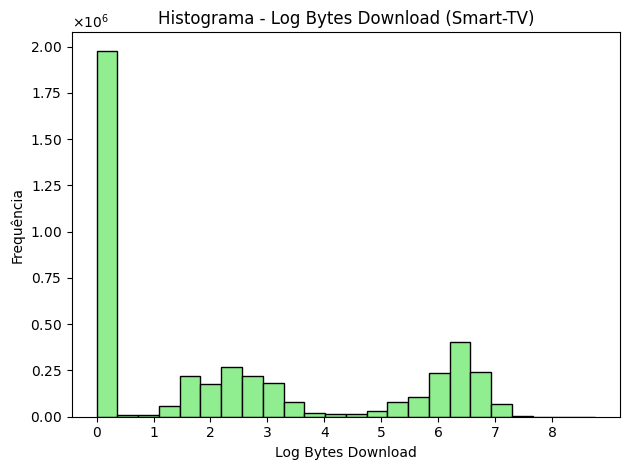

Smart TV - Log Bytes Download: Média: 2.35, Variância: 6.72, Desvio Padrão: 2.59


In [8]:
# Histograma para Smart TV (Log Bytes Down)
smart_tv_log_bytes_down = smart_tv_data['log_bytes_down']
bins_smart_tv_down = calcular_bins_sturges(smart_tv_log_bytes_down)

plt.hist(smart_tv_log_bytes_down, bins=bins_smart_tv_down, color='lightgreen', edgecolor='black')
plt.xticks(range(0, 9))  # Define os valores do eixo x de 0 a 8
plt.title('Histograma - Log Bytes Download (Smart-TV)')
plt.xlabel('Log Bytes Download')
plt.ylabel('Frequência')

# Configurar o formato do eixo Y para notação exponencial
ax = plt.gca()  # Obter o eixo atual
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Forçar notação científica
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Estatísticas - Smart TV (Log Bytes Down)
media_smart_tv_down = np.mean(smart_tv_log_bytes_down)
variancia_smart_tv_down = np.var(smart_tv_log_bytes_down, ddof=1)
desvio_padrao_smart_tv_down = np.std(smart_tv_log_bytes_down, ddof=1)
print(f'Smart TV - Log Bytes Download: Média: {media_smart_tv_down:.2f}, Variância: {variancia_smart_tv_down:.2f}, Desvio Padrão: {desvio_padrao_smart_tv_down:.2f}')


Histograma e estatísticas para Chromecast - Log Bytes Upload

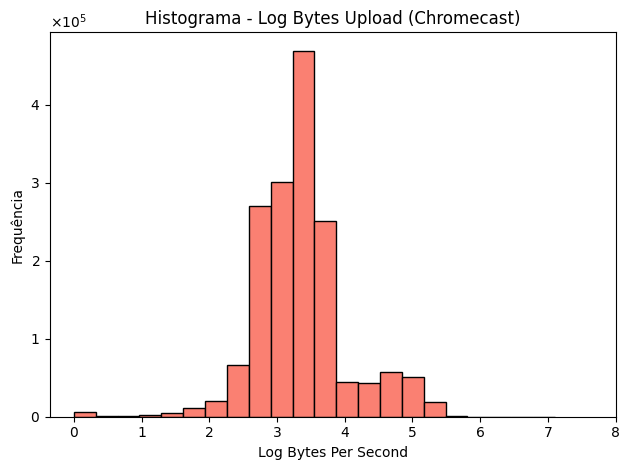

Chromecast - Log Bytes Upload: Média: 3.35, Variância: 0.46, Desvio Padrão: 0.68


In [9]:
# Histograma para Chromecast (Log Bytes Up)
chromecast_log_bytes_up = chromecast_data['log_bytes_up']
bins_chromecast_up = calcular_bins_sturges(chromecast_log_bytes_up)

plt.hist(chromecast_log_bytes_up, bins=bins_chromecast_up, color='salmon', edgecolor='black')
plt.xticks(range(0, 9))  # Define os valores do eixo x de 0 a 8
plt.title('Histograma - Log Bytes Upload (Chromecast)')
plt.xlabel('Log Bytes Per Second')
plt.ylabel('Frequência')


# Configurar o formato do eixo Y para notação exponencial
ax = plt.gca()  # Obter o eixo atual
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Forçar notação científica
ax.yaxis.set_major_formatter(formatter)


plt.tight_layout()
plt.show()


# Estatísticas - Chromecast (Log Bytes Up)
media_chromecast_up = np.mean(chromecast_log_bytes_up)
variancia_chromecast_up = np.var(chromecast_log_bytes_up, ddof=1)
desvio_padrao_chromecast_up = np.std(chromecast_log_bytes_up, ddof=1)
print(f'Chromecast - Log Bytes Upload: Média: {media_chromecast_up:.2f}, Variância: {variancia_chromecast_up:.2f}, Desvio Padrão: {desvio_padrao_chromecast_up:.2f}')


Histograma e estatísticas para Chromecast - Log Bytes Download

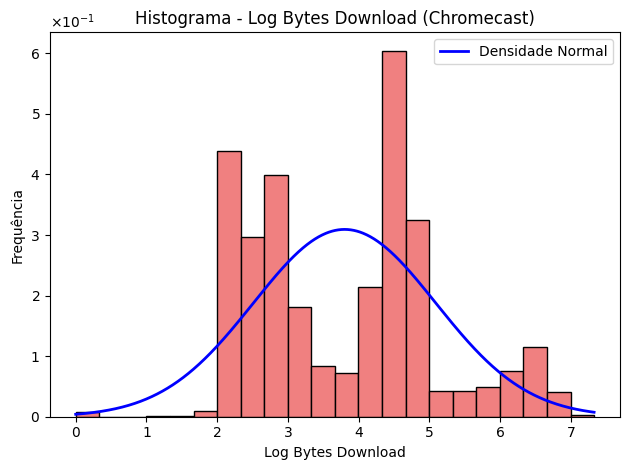

Chromecast - Log Bytes Download: Média: 3.80, Variância: 1.66, Desvio Padrão: 1.29


In [10]:
# Histograma para Chromecast (Log Bytes Down)
chromecast_log_bytes_down = chromecast_data['log_bytes_down']
bins_chromecast_down = calcular_bins_sturges(chromecast_log_bytes_down)


# Estatísticas - Chromecast (Log Bytes Down)
media_chromecast_down = np.mean(chromecast_log_bytes_down)
variancia_chromecast_down = np.var(chromecast_log_bytes_down, ddof=1)
desvio_padrao_chromecast_down = np.std(chromecast_log_bytes_down, ddof=1)


# Plotar o histograma
plt.hist(chromecast_log_bytes_down, bins=bins_chromecast_down, color='lightcoral', edgecolor='black', density=True)
plt.xticks(range(0, 9))  # Define os valores do eixo x de 0 a 8
plt.title('Histograma - Log Bytes Download (Chromecast)')
plt.xlabel('Log Bytes Download')
plt.ylabel('Frequência')


# Gerar a linha da densidade normal
x = np.linspace(min(chromecast_log_bytes_down), max(chromecast_log_bytes_down), 1000)
densidade_normal = norm.pdf(x, loc=media_chromecast_down, scale=desvio_padrao_chromecast_down)

plt.plot(x, densidade_normal, color='blue', linewidth=2, label='Densidade Normal')


# Configurar o formato do eixo Y para notação exponencial
ax = plt.gca()  # Obter o eixo atual
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Forçar notação científica
ax.yaxis.set_major_formatter(formatter)

plt.legend()
plt.tight_layout()
plt.show()


print(f'Chromecast - Log Bytes Download: Média: {media_chromecast_down:.2f}, Variância: {variancia_chromecast_down:.2f}, Desvio Padrão: {desvio_padrao_chromecast_down:.2f}')

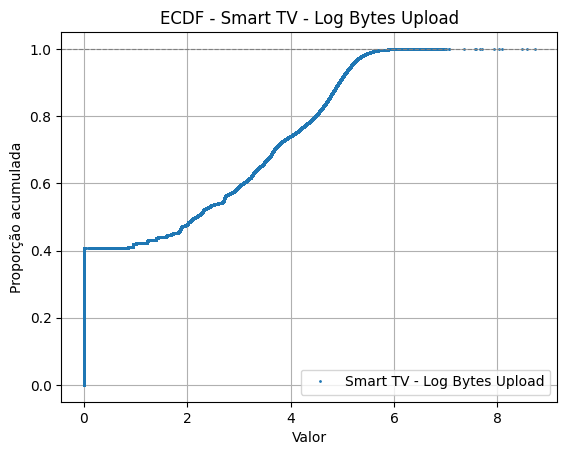

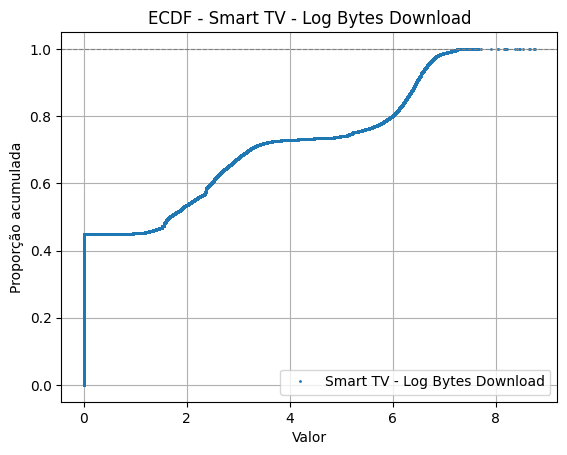

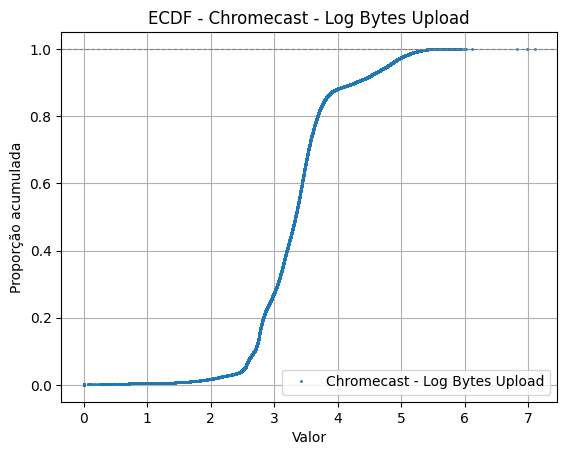

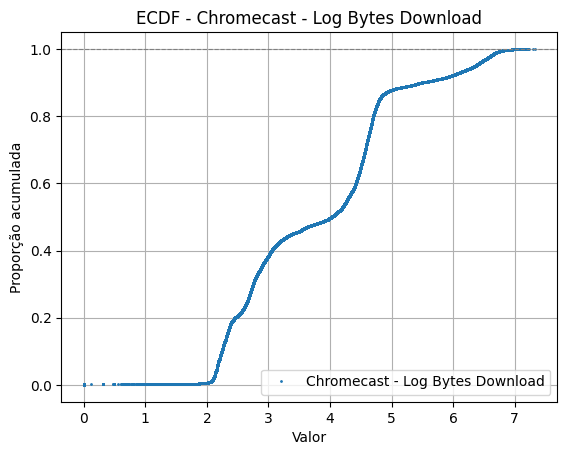

In [11]:
def plot_ecdf(data, label):
    # Ordena os dados
    sorted_data = np.sort(data)
    # Calcula as proporções acumuladas
    y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Plota a ECDF com pontos menores
    plt.plot(sorted_data, y_vals, marker='.', linestyle='none', markersize=2, label=label)
    plt.title(f'ECDF - {label}')
    plt.xlabel('Valor')
    plt.ylabel('Proporção acumulada')
    
    # Adiciona linha auxiliar y = 1.0 pontilhada
    plt.axhline(1.0, color='gray', linestyle='--', linewidth=0.8)
    
    plt.grid(True)
    plt.legend()

# Criar ECDF para Smart TV (Log Bytes Up)
plot_ecdf(smart_tv_data['log_bytes_up'], 'Smart TV - Log Bytes Upload')
plt.show()

# Criar ECDF para Smart TV (Log Bytes Down)
plot_ecdf(smart_tv_data['log_bytes_down'], 'Smart TV - Log Bytes Download')
plt.show()

# Criar ECDF para Chromecast (Log Bytes Up)
plot_ecdf(chromecast_data['log_bytes_up'], 'Chromecast - Log Bytes Upload')
plt.show()

# Criar ECDF para Chromecast (Log Bytes Down)
plot_ecdf(chromecast_data['log_bytes_down'], 'Chromecast - Log Bytes Download')
plt.show()

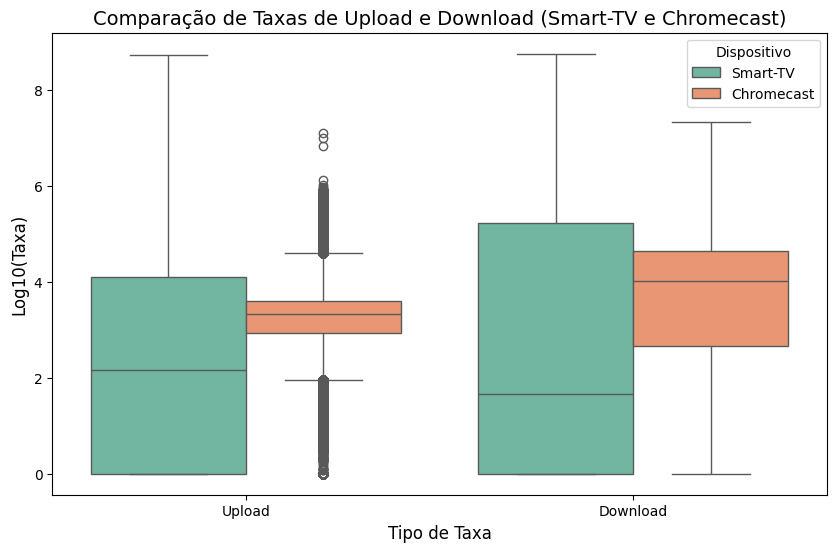

In [12]:
# Adicionar as taxas de upload e download de cada dispositivo em um único DataFrame
smart_tv_data['dispositivo'] = 'Smart-TV'
chromecast_data['dispositivo'] = 'Chromecast'

# Adicionar categorias (upload/download) e concatenar os dois DataFrames
smart_tv_data['tipo_taxa'] = 'Upload'
chromecast_data['tipo_taxa'] = 'Upload'

smart_tv_upload = smart_tv_data[['log_bytes_up', 'dispositivo', 'tipo_taxa']].rename(columns={'log_bytes_up': 'taxa'})
chromecast_upload = chromecast_data[['log_bytes_up', 'dispositivo', 'tipo_taxa']].rename(columns={'log_bytes_up': 'taxa'})

smart_tv_data['tipo_taxa'] = 'Download'
chromecast_data['tipo_taxa'] = 'Download'

smart_tv_download = smart_tv_data[['log_bytes_down', 'dispositivo', 'tipo_taxa']].rename(columns={'log_bytes_down': 'taxa'})
chromecast_download = chromecast_data[['log_bytes_down', 'dispositivo', 'tipo_taxa']].rename(columns={'log_bytes_down': 'taxa'})

# Concatenar todas as categorias em um único DataFrame
data_combined = pd.concat([smart_tv_upload, chromecast_upload, smart_tv_download, chromecast_download])

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_taxa', y='taxa', hue='dispositivo', data=data_combined, palette='Set2')

# Configurações do gráfico
plt.title('Comparação de Taxas de Upload e Download (Smart-TV e Chromecast)', fontsize=14)
plt.xlabel('Tipo de Taxa', fontsize=12)
plt.ylabel('Log10(Taxa)', fontsize=12)
plt.legend(title='Dispositivo')
plt.savefig('figuras/comparacao_boxplots.png')
plt.show()
